## Part 1: Data preprocessing
#### Dataset:https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')

### Data Exploration

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

11

In [8]:
dataset.select_dtypes(include=['object']).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [9]:
len(dataset.select_dtypes(include=['object']).columns)

3

### Statistical Summary

In [10]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Dealing with missing data

In [11]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Encoding the categorical data

In [12]:
 dataset.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6410,6411,15762351,Chao,689,Spain,Female,63,1,0.00,2,1,1,186526.12,0
209,210,15612087,Dike,671,France,Male,45,2,106376.85,1,0,1,158264.62,0
8318,8319,15765402,H?,520,France,Female,39,6,145644.05,1,0,0,104118.93,0


In [13]:
dataset=dataset.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [14]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [16]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
 dataset.drop(['Geography'],axis=1).groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [19]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [20]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### One hot encoding

In [21]:
dataset=pd.get_dummies(data=dataset,drop_first=True,dtype='int')

In [22]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Countplot

<Axes: xlabel='Exited', ylabel='count'>

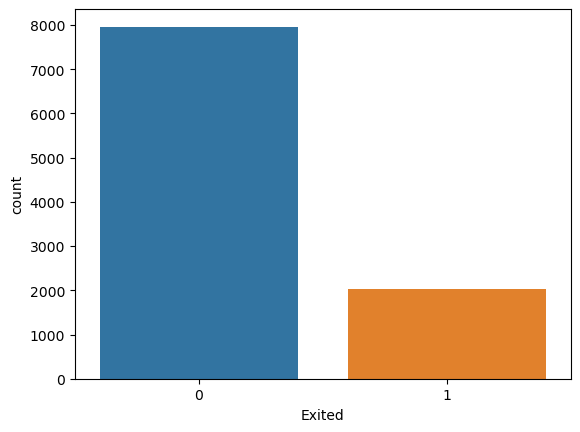

In [23]:
sns.countplot(x='Exited',data=dataset)

In [24]:
#Staying with bank
(dataset['Exited']==0).sum()

7963

In [25]:
#Left the bank
(dataset['Exited']==1).sum()

2037

 ### Correlation matrix and heatmap

In [26]:
dataset_2=dataset.drop('Exited',axis=1)

<Axes: title={'center': 'Correlation with Exited'}>

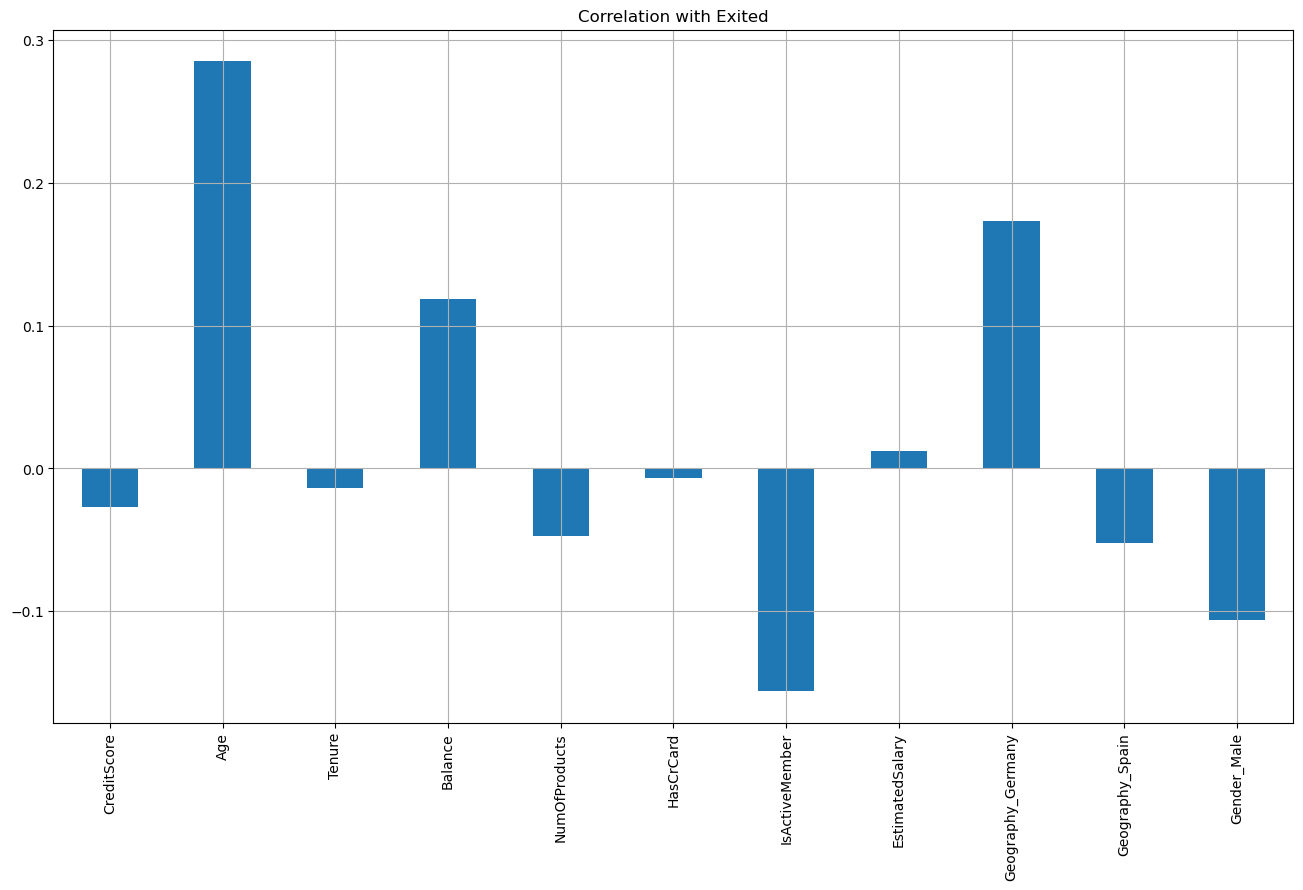

In [27]:
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize=(16,9),title='Correlation with Exited',grid=True)

<Axes: >

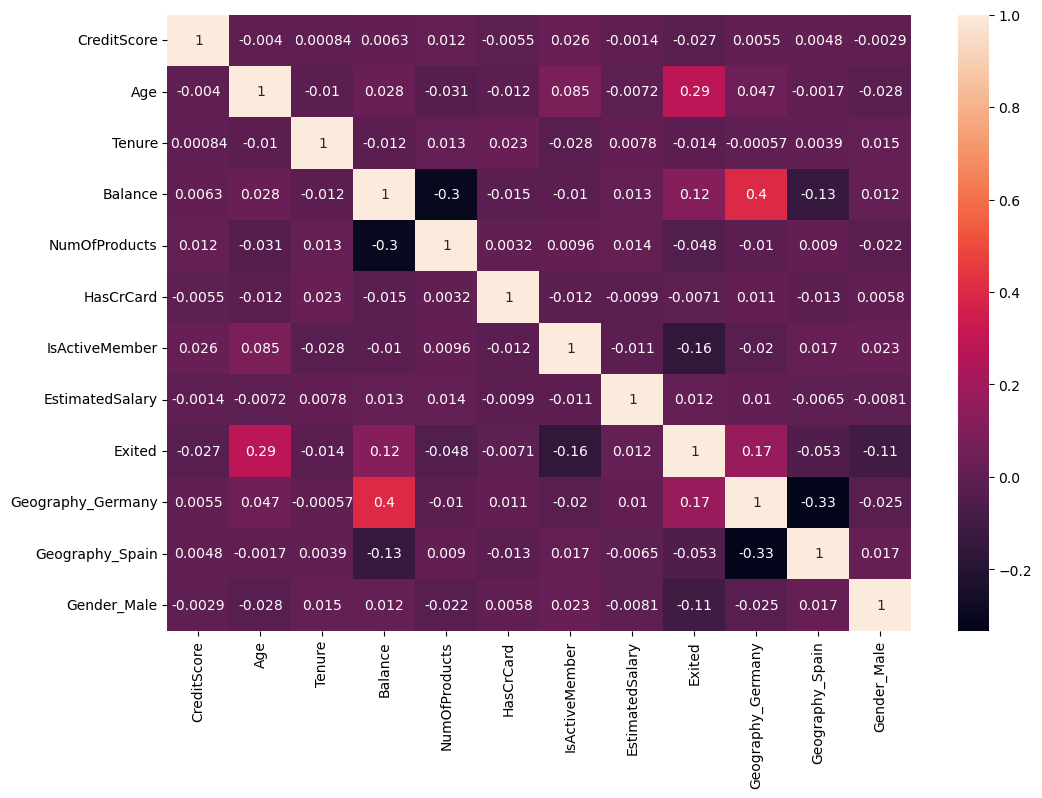

In [28]:
corr=dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

### Spliting the dataset

In [29]:
X=dataset_2
y=dataset['Exited']

In [30]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
X_train.shape

(8000, 11)

In [34]:
X_test.shape

(2000, 11)

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [36]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Part 2: Building the Model

### 1) Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
classifier_lr=LogisticRegression(random_state=0)
classifier_lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred=classifier_lr.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [40]:
result=pd.DataFrame([['Logistic Regression',acc,f1,prec,rec]],
                   columns=['Model','accuracy_score','f1_score','precision_score','recall_score'])
result

,Model,accuracy_score,f1_score,precision_score,recall_score
0,Logistic Regression,0.813,0.315018,0.609929,0.212346


<Axes: >

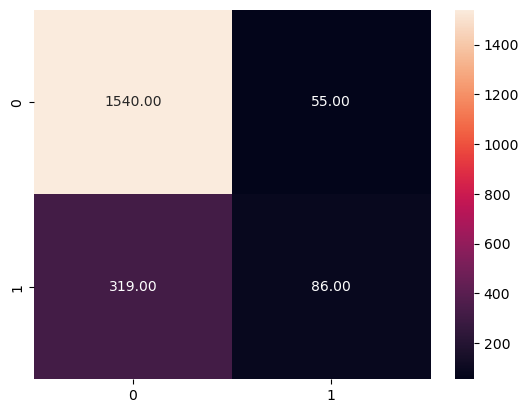

In [41]:
cm=confusion_matrix(y_test,y_pred)     
sns.heatmap(cm,annot=True,fmt='0.1f')

### Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_lr,X=X_train,y=y_train,cv=10)

print('Accuracy is:',accuracies.mean()*100,'%')
print('Standard Deviation is:',accuracies.std()*100)

Accuracy is: 80.8375 %
Standard Deviation is: 0.8786530885395


### 2] Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [44]:
y_pred=classifier_rf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [46]:
result1=pd.DataFrame([['RandomForestClassifier',acc,f1,prec,rec]],
                   columns=['Model','accuracy_score','f1_score','precision_score','recall_score'])

In [47]:
results=pd.concat([result,result1],axis=0,ignore_index=True)
results

,Model,accuracy_score,f1_score,precision_score,recall_score
0,Logistic Regression,0.8130,0.315018,0.609929,0.212346
1,RandomForestClassifier,0.8655,0.611833,0.736111,0.523457


<Axes: >

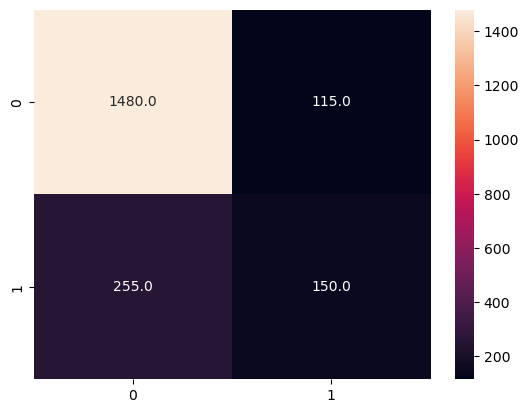

In [75]:
cm=confusion_matrix(y_test,y_pred)     
sns.heatmap(cm,annot=True,fmt='0.1f')

### Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_rf,X=X_train,y=y_train,cv=10)

print('Accuracy is:',accuracies.mean()*100,'%')
print('Standard Deviation is:',accuracies.std()*100)

Accuracy is: 85.9625 %
Standard Deviation is: 1.0186541365939672


### 3] XGBoost

In [50]:
from xgboost import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
y_pred=classifier_xgb.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [53]:
result3=pd.DataFrame([['xgboost',acc,f1,prec,rec]],
                   columns=['Model','accuracy_score','f1_score','precision_score','recall_score'])

In [54]:
results=pd.concat([results,result3],axis=0,ignore_index=True)
results

,Model,accuracy_score,f1_score,precision_score,recall_score
0,Logistic Regression,0.8130,0.315018,0.609929,0.212346
1,RandomForestClassifier,0.8655,0.611833,0.736111,0.523457
2,xgboost,0.7940,0.426184,0.488818,0.377778


<Axes: >

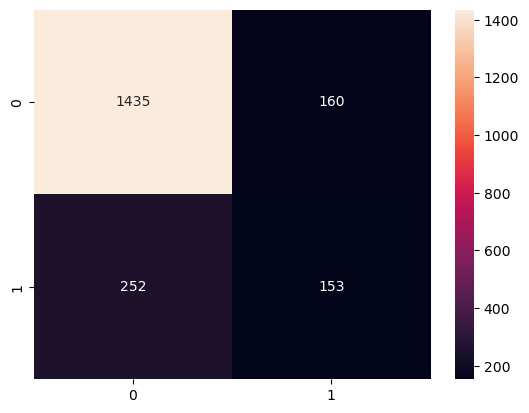

In [55]:
cm=confusion_matrix(y_test,y_pred)     
sns.heatmap(cm,annot=True,fmt=".0f")

### Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_xgb,X=X_train,y=y_train,cv=10)

print('Accuracy is:',accuracies.mean()*100,'%')
print('Standard Deviation is:',accuracies.std()*100)

Accuracy is: 85.125 %
Standard Deviation is: 0.9953014618697171


### Part 3: Randomized Search to find the best parameters (XGBoost Classifier)

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
parameters={
    'learning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,7,8,10,12,15 ],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
    }

In [59]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [60]:
randomized_search=RandomizedSearchCV(estimator=classifier_xgb,param_distributions=parameters,n_iter=5,
                                    n_jobs=-1,scoring='roc_auc',cv=5,verbose=3)

In [61]:
randomized_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [62]:
randomized_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
randomized_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [64]:
randomized_search.best_score_

0.8648169627675169

### Part4: Final Model (XGBoost Classifier)

In [65]:
from xgboost import XGBClassifier
classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1,monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [67]:
result3=pd.DataFrame([['xgboost_final',acc,f1,prec,rec]],
                   columns=['Model','accuracy_score','f1_score','precision_score','recall_score'])

In [68]:
results=pd.concat([results,result3],axis=0,ignore_index=True)
results

,Model,accuracy_score,f1_score,precision_score,recall_score
0,Logistic Regression,0.8130,0.315018,0.609929,0.212346
1,RandomForestClassifier,0.8655,0.611833,0.736111,0.523457
2,xgboost,0.7940,0.426184,0.488818,0.377778
3,xgboost_final,0.8150,0.447761,0.566038,0.370370


<Axes: >

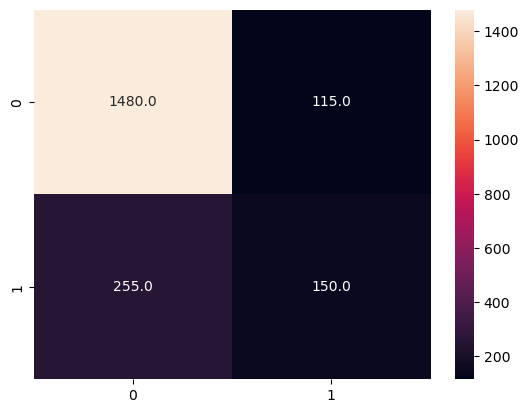

In [77]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='0.1f')

### Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)

print('Accuracy is:',accuracies.mean()*100,'%')
print('Standard Deviation is:',accuracies.std()*100)

Accuracy is: 86.37499999999999 %
Standard Deviation is: 0.8422440263961513


### Predicting the single value

In [71]:
single_ob=[[608,41,1,83807.86,1,0,1,112542.58,0,1,0]]

In [72]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [73]:
classifier.predict(sc.transform(single_ob))

array([0])

In [74]:
classifier.predict([[608,41,1,83807.86,1,0,1,112542.58,0,1,0]])

array([0])